# Loops
--------------------------------------------------------------------------------------------------------------------------------

In this notebook, you will learn about:
 - the use of [loops](#Loops) to carry out a "large" number of computations with varying parameters.

# Loops

What is a loop?

A loop is a set of instructions that is repeatedly executed until a logical condition is met. A loop usually has five main elements:
1. a counter, which keeps track of the number of iterations/times the loop has been executed;
2. a counter start, which defines the value the counter starts counting from;
3. a counter increment/decrement, which defines whether the counter is increased or decreased after each iteration step and by how much (e.g., increament by 1 unit, decrement by 2 units);
4. a condition, which define the logical condition that needs to be met to stop/exit the loop;
5. and a set of instructions to be executed.

A graphical representation of this is shown in the diagrma below.
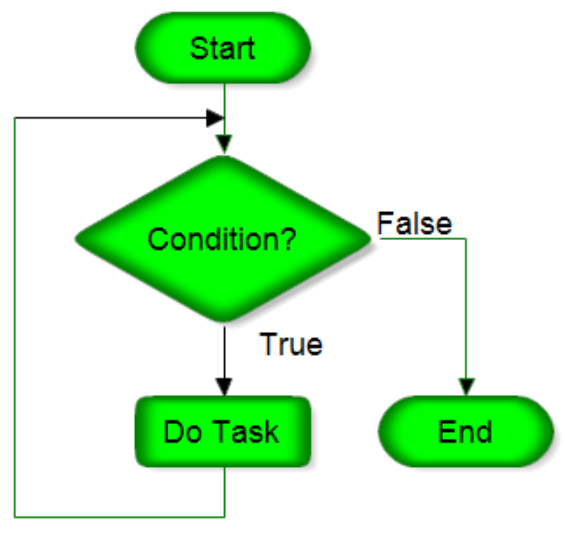
Diagram credit: __RFF Electronics__ https://www.rff.com/structured_flowchart.php

For the examples in this notebook, we will use [for-loops](https://en.wikipedia.org/wiki/For_loop).

In the example code below, a loop is run for 15 steps/iterations. On each iteration, the value of the __elem__ variable is printed to screen.

In [31]:
for elem in range(0,15):
    print(elem)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


The five main elements in the loop above are: 
- counter -> __*elem*__,
- counter start -> __*elem = 0*__,
- counter increment -> in Python this is implicitly defined and equal to 1,
- condition, __*elem < 15*__ (the loop stops once __*elem*__ reaches a value equal to 15),
- and set of instructions -> the is only one instruction __*print(elem)*__.

Now, let's look at an example of using a loop to carry out a "large" number of computations.

First, import the NumPy library

In [32]:
import numpy as np

We will expand the lift and drag forces example from the previous tutorial.

The functions to compute these are repeated below.

In [33]:
def compute_lift_force(V, S, CL, rho):
    
    # Lift force computation
    L = 1/2*(rho*V**2*S*CL)
    
    # Return result
    return L

def compute_drag_force(V, S, CD, rho):
    
    # Drag force computation
    D = 1/2*(rho*V**2*S*CD)
    
    # Return result
    return D

And the corresponding $V$, $S$, $\rho$, $C_L$ and $C_D$ values:

In [34]:
# Physical constants
g = 9.81    # Earth's gravitational acceleration, [m/s^2]
rho = 1.225 # Air density at mean sea level, [kg/m^3]

# Aircraft's wing geometric characteristics
b = 1.8        # Wing span, [m]
AR = 8.2       # Wing aspect ratio
S = (b**2)/AR  # Wing reference area, [m^2]

# Aircraft's mass, [kg]
m = 2.5
# Compute aircraft's weight [N]
W = m*g

# Aircraft's flight speed, m/s
V = 18

# Aircraft's lift and drag coefficients
CL = W/(0.5*rho*(V**2)*S)
CD = 0.099

We need to create three "placeholder" arrays, each with 100 elements and filled with zeros. Doing this is more memory efficient than creating elements dynamically.

In [35]:
# Create flight speed, lift force and drag force arrays with each with 100 elements and filled with zeros
V_large_array = np.zeros((100,))
Lift_large_array = np.zeros((100,))
Drag_large_array = np.zeros((100,))

Now, let's define the initial, end and step values for the flight speed in the computations.

In [36]:
# Number of elements 
elem_number = 100
# Initial flight speed value
init_value = 10
# End flight speed value
end_value  = 60
# Flight speed step value
step = (end_value-init_value)/(elem_number-1)
# Print result
print("The flight speed initial, end and step values are: {:.2f}, {:.2f} and {:.2f} m/s, respectively".format(init_value,end_value,step))

The flight speed initial, end and step values are: 10.00, 60.00 and 0.51 m/s, respectively


Then, let's use a loop to compute 100 different values for the lift and drag forces using the flight speed range and step defined above.

In this case, the counter, counter start and counter increment remain the same. The remaining two elements in the loop are:
- condition, __*elem < elem_number*__ (the loop stops once __*elem*__ reaches a value equal to elem_number = 100),
- and set of instructions -> the isntructions to compute the lift and drag forces, as well as to update/increase the value of the flight speed

The code below show how to implemetn this.

In [37]:
# Set the initial value (index/elem = 0) equal to init_value
V_large_array[0] = init_value
# Execute instruction in a loop
for elem in range(0,elem_number):
    
    ## Set of instructions to repeatedly execute
    # Compute lift force for value V_large_array[elem], and store it in Lift_large_array[elem]
    Lift_large_array[elem] = compute_lift_force(V_large_array[elem], S, CL, rho)
    # Compute drag force for value V_large_array[elem], and store it in Drag_large_array[elem]
    Drag_large_array[elem] = compute_drag_force(V_large_array[elem], S, CD, rho)
    # Verify that elem < (elem_number-1), this ensures that the code doesn't try to access
    #    an element that doesn't exist, e.g., elem = 100, elem = 101, elem = 102
    if elem < (elem_number-1):
        # Increase V value for next computation step
        V_large_array[elem+1] = V_large_array[elem] +step

We can verify that loop results by printing the flight speed and lift force arrays values to screen.

In [38]:
print("The values in the flight speed array are: \n{}".format(V_large_array))
print("\nThe values in the lift force array are: \n{}".format(Lift_large_array))

The values in the flight speed array are: 
[10.         10.50505051 11.01010101 11.51515152 12.02020202 12.52525253
 13.03030303 13.53535354 14.04040404 14.54545455 15.05050505 15.55555556
 16.06060606 16.56565657 17.07070707 17.57575758 18.08080808 18.58585859
 19.09090909 19.5959596  20.1010101  20.60606061 21.11111111 21.61616162
 22.12121212 22.62626263 23.13131313 23.63636364 24.14141414 24.64646465
 25.15151515 25.65656566 26.16161616 26.66666667 27.17171717 27.67676768
 28.18181818 28.68686869 29.19191919 29.6969697  30.2020202  30.70707071
 31.21212121 31.71717172 32.22222222 32.72727273 33.23232323 33.73737374
 34.24242424 34.74747475 35.25252525 35.75757576 36.26262626 36.76767677
 37.27272727 37.77777778 38.28282828 38.78787879 39.29292929 39.7979798
 40.3030303  40.80808081 41.31313131 41.81818182 42.32323232 42.82828283
 43.33333333 43.83838384 44.34343434 44.84848485 45.35353535 45.85858586
 46.36363636 46.86868687 47.37373737 47.87878788 48.38383838 48.88888889
 49.39393

Additionally, the last element in the lift force array is the max. value in the array, and it aligns with the max. value in the flight speed array (also the last element). This makes sense as the lift force changes with the square of flight speed.

In fact, both the lift force and drag force arrays reach a maximum value when the flight speed is maximum. For this example, the array's max. values are:

In [39]:
print("The max. value in the flight speed array is: {:.3f}".format(V_large_array.max()))
print("The max. value in the lift force array is: {:.3f}".format(Lift_large_array.max()))
print("The max. value in the drag force array is: {:.3f}".format(Drag_large_array.max()))

The max. value in the flight speed array is: 60.000
The max. value in the lift force array is: 272.500
The max. value in the drag force array is: 86.253


Next, we can plot the results using a slightly modified versionof the code written in the __Data plotting__ tutorial.

Import the __*Matplotlib*__ library

In [41]:
import matplotlib.pyplot as plt

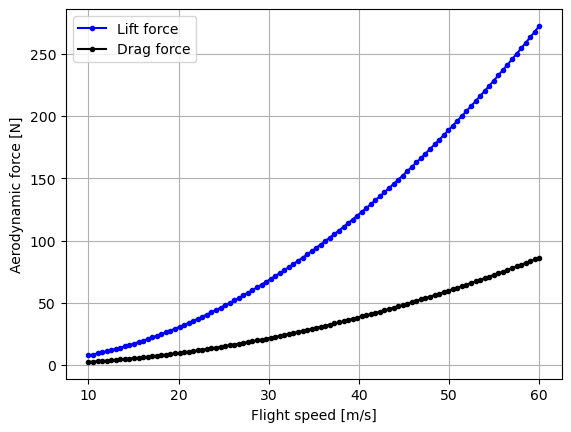

In [42]:
plt.figure()
plt.plot(V_large_array,Lift_large_array,'b.-',label='Lift force')
plt.plot(V_large_array,Drag_large_array,'k.-',label='Drag force')
plt.xlabel("Flight speed [m/s]")
plt.ylabel("Aerodynamic force [N]")
plt.legend()
plt.grid()
plt.show()

Lastly, by removing the markers we get a "cleaner" looking plot.

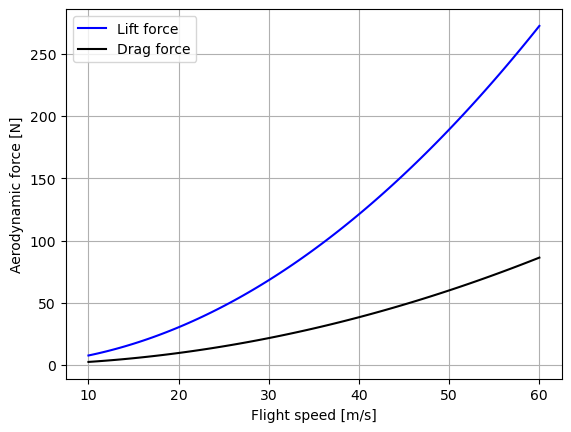

In [43]:
plt.figure()
plt.plot(V_large_array,Lift_large_array,'b-',label='Lift force')
plt.plot(V_large_array,Drag_large_array,'k-',label='Drag force')
plt.xlabel("Flight speed [m/s]")
plt.ylabel("Aerodynamic force [N]")
plt.legend()
plt.grid()
plt.show()